# Parte teórica

Classifique as afirmações em Verdadeiro ou Falso, justifique as afirmativas falsas

1 - O espaço de cores RGB é amplamente utilizado pois é o mais intuitivo para seres humanos

In [15]:
# F - O espaço de cor mais intuitivo para os seres humanos é o HSV

2 - Imagens vetoriais apresentam serrilhamento quando são ampliadas

In [18]:
# F - Imagens vetoriais não apresentam serrilhamento, somente imagens matriciais

3 - A lógica XOR aplicada em uma imagem detecta os pixels que mudaram de cor

In [ ]:
# V

4 - O código abaixo representa um circulo com 110 de altura, 128 de largura e rotacionano em 64 graus.
"<circle cx='110' cy='128' r='64' fill='red'/>

In [ ]:
# F - cx e cy reoresentam a posição do centro e r representa o raio do circulo

5 - Algumas imagens podem ter um quarto canal chamado Alpha que representa a opacidade do pixel

In [ ]:
# V

# Parte prática

## Material de apoio

### Importações

```
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
```

### Manipulação de imagens

```
img = Image.open('nome.extensão')
img = np.array(Image.open('nome.extensão'))
img = img[:, :, :3]
img_pil = Image.fromarray(img_np)
img.save('nome.png')
Image.fromarray(img).save('nome_arquivo.extensao')
(l,c,p) = img.shape
```

### Greyscale

#### Algoritmo genérico, substituir o método escolhido
```
img_avg = np.zeros(shape=(l, c), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        r = float(img_np[i, j, 0])
        g = float(img_np[i, j, 1])
        b = float(img_np[i, j, 2])
        
        img_avg[i, j] = (aplicar método)
```

#### Métodos: 

Lightness: $\frac{max(R,G,B)+min(R,G,B)}{2}$

Average: $\frac{R+G+B}{3}$

Luminosity: $0.2126 \cdot R + 0.7152 \cdot G + 0.0722 \cdot B$

### Escalonamento com nearest neighbor

```
ls, cs = l * sy, c * sx
mario_nn = np.zeros(shape=(ls, cs, p), dtype=np.uint8)

for i in range(ls):
    for j in range(cs):
        new_y = int(np.floor(i * (l / ls)))
        new_x = int(np.floor(j * (c / cs)))
        
        mario_nn[i, j] = mario[new_y, new_x]
```

### Cisalhamento

```
img_shear = np.zeros((int(l * (1.1 + cy)), int(c * (1.1 + cx)), p), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        new_x = int(j + cx * i)
        new_y = int(cy * j + i)
        
        img_shear[new_y, new_x] = img[i, j]
```

### Imagem grayscale para imagem binária de 3 canais

``` 
bin = np.zeros(shape=(l,c,3),dtype=np.uint8)
    
for i in range(l):
    for j in range(c):
        for k in range(3):
            if img[i,j] > thresh: 
                bin[i,j,k] = 255 
            else: 
                bin[i,j,k] = 0

```

**1 -** Importe as bibliotecas que serão usadas

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

**2 -** Abra as imagens horse.jpg e landscape.png, retire o canal alpha se necessário, exiba essas imagens e mostre o formato de cada uma

(768, 1024, 3)
(384, 512, 3)


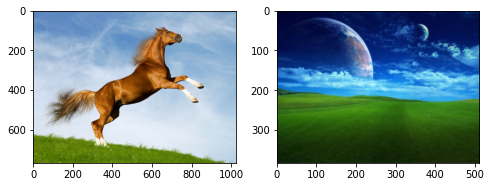

In [3]:
horse = np.array(Image.open("horse.jpg"))[:,:,:3]
landscape = np.array(Image.open("landscape.jpg"))[:,:,:3]

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(horse)
plt.subplot(2,2,2)
plt.imshow(landscape)

print(horse.shape)
print(landscape.shape)

**3 -** Crie uma função que realize o escalonamento de uma imagem que receba como parâmetro uma **imagem, sx e sy**, sendo sx e sy os fatores de escalonamento e **retorne a imagem escalonada**, em seguida aplique o escalonamento na imagem "landscape" para que fique do mesmo tamanho da imagem "horse". Exiba o resultado.

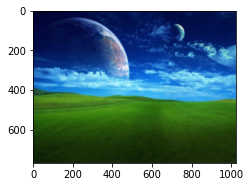

In [4]:
def amplify_img(img,sx,sy):
    (l, c ,p) = img.shape

    (ls, cs) = (l*sx,c*sy)

    sc_image = np.zeros(shape=(ls, cs, p), dtype=np.uint8)

    for i in range(ls):
        for j in range(cs):
            new_x= int(np.floor(i * (l / ls)))
            new_y = int(np.floor(j * (c / cs)))

            sc_image[i, j] = img[new_x, new_y]
            
    return sc_image

landscape_big = amplify_img(landscape,2,2)
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(landscape_big)

**4 -** Crie uma função para aplicar um método grayscale de sua escolha, que receba como parâmetro uma imagem e retorne uma imagem em greyscale. Aplique essa função na imagem "horse" e mostre o resultado.

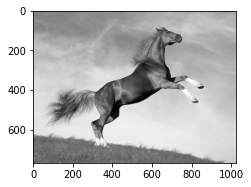

In [5]:
def grey_scale(img):
    res = (img[:,:,0] * 0.2126 + 
          img[:,:,1] * 0.7152 + 
          img[:,:,2] * 0.0722).astype(np.uint8)
    
    return res

horse_grey = grey_scale(horse)

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(horse_grey,cmap="gray")

**5 -** Crie uma função para transformar uma imagem grayscale em uma imagem binária, que receba como parâmetro uma imagem e o threshhold para realizar a operação e retorne uma imagem binária. Aplique essa função na imagem resultante da etapa anterior com threshold de valor 135 e mostre o resultado.

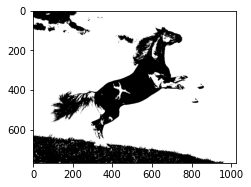

In [6]:
def binary(img,thresh):
    (l,c) = img.shape
    res = np.zeros(shape=(l,c,3),dtype=np.uint8)
    
    for i in range(l):
        for j in range(c):
            if img[i,j] > thresh: 
                res[i,j,:] = 255 
            else: 
                res[i,j,:] = 0
    return res

bin_horse = binary(horse_grey,135)    
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(bin_horse)


**6 -** Realize a operação NOT com a imagem da etapa anterior e mostre o resultado

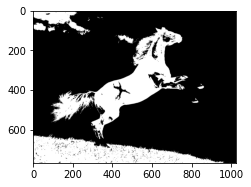

In [7]:
horse_not = ~ bin_horse

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(horse_not)

**7 -** Aplique a imagem da questão anterior como uma máscara (Lógica E) com a imagem resultante do escalonamento na questão 3. Mostre o resultado

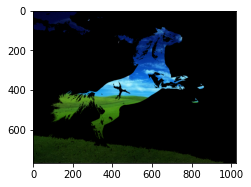

In [8]:
op_and = horse_not & landscape_big

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(op_and)

**8 -** Crie uma função para aplicar o cisalhamento em cima de uma imagem, que recebe como parâmetro uma imagem, cx e cy, sendo cx e cy os coeficientes do cisalhamento e retorne a imagem com o efeito aplicado. Mostre o resultado.

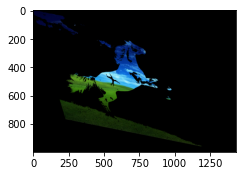

In [9]:
def shearing(img, cx, cy):
    (l, c, p) = img.shape
    img_shear = np.zeros((int(l * (1.1 + cy)), int(c * (1.1 + cx)), p), dtype=np.uint8)
    for i in range(l):
        for j in range(c):
            new_x = int(j + cx * i)
            new_y = int(cy * j + i)
        
            img_shear[new_y, new_x] = img[i, j]
            
    return img_shear

res_shear = shearing(op_and, 0.3, 0.2)

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(res_shear)

**9 -** Salve a imagem da questão anterior no disco com o nome "resultado.jpg"

In [13]:
Image.fromarray(res_shear).save("resultado.jpg")